# Visualizations for final presentation

In [1]:
# imports here
import numpy as np
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# load FIFA-19 dataset
# read data on position
dat = pd.read_csv("../../../datasets/fifa19/data.csv")
# drop rows with NaN positions
data = dat.dropna(subset=['Position'])
# select best rows per position based on overall
best_rows = data.loc[data.groupby('Position')['Overall'].idxmax()]
# choose only the name, position, overall and photo values
posvals = best_rows[['Name', 'Position', 'Overall', 'Photo']]

In [3]:
# load background image
img = plt.imread("../images/Field.png")

### Scatter function: scatter football field positions on background image

In [4]:
def scatter_position(x):
    """
    Function to compute the x and y coordinates on background image given position string

    Arguments:
    x -- str; indicates one of 27 valid positions

    Returns:
    list of x, y location to scatter to
    """
    # weak asserts
    assert isinstance(x, str)
    assert len(x) in [2, 3]
    if len(x) == 2:
        xpos = dict()
        xpos['R'] = 64
        xpos['C'] = 272
        xpos['L'] = 480
        ypos = dict()
        ypos['S'] = 700
        ypos['F'] = 600
        ypos['W'] = 500
        ypos['M'] = 400
        ypos['B'] = 200
        if x == 'ST':
            return [272, 700]
        if x == 'GK':
            return [272, 80]
        return [xpos[x[0]], ypos[x[1]]]
    ypos = dict()
    ypos['AM'] = 500
    ypos['DM'] = 300
    ypos['CM'] = 400
    ypos['CB'] = 200
    ypos['WB'] = 300
    if x[1:] == 'WB':
        if x[0] == 'R':
            return [64, ypos['WB']]
        return [480, ypos['WB']]
    xpos = dict()
    xpos['R'] = 168
    xpos['C'] = 272
    xpos['L'] = 376
    return [xpos[x[0]], ypos[x[1:]]]

In [5]:
# get percentages
plot_x = list()
plot_y = list()
colors = list()
cinds = posvals.index

### Plot positions: 1st visualization of presentation

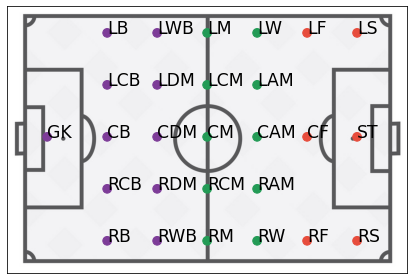

In [6]:
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,800, 0,533])
# find scatter position of each position
for cin in cinds:
    xyl = scatter_position(posvals.loc[cin]['Position'])
    plot_x.append(xyl[1])
    if xyl[1] < 400:
        colors.append('#7d3c98') # purple instead of blue
    elif xyl[1]<600:
        colors.append('#239b56') # green instead of yellow
    else:
        colors.append('#e74c3c') # red instead of firebrick
    plot_y.append(xyl[0])
    ax.annotate("{}".format(posvals.loc[cin]['Position']), (xyl[1], xyl[0]), fontfamily='sans-serif', fontsize='xx-large')
ax.scatter(plot_x, plot_y, color=colors, s=75)
plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        right=False,
        labelleft=False
        )
plt.tight_layout()
plt.show()

### Overview of Dataset

In [7]:
# slide 4
# TODO: David Liau

### Best players for each position

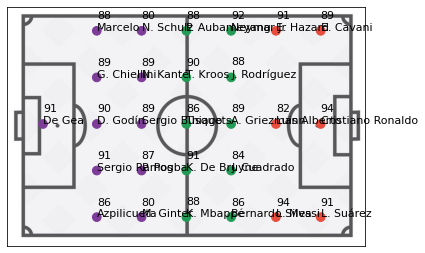

In [8]:
# get percentages
plot_x = list()
plot_y = list()
colors = list()
cinds = posvals.index

fig, ax = plt.subplots()
ax.imshow(img, extent=[0,800, 0,533])

for cin in cinds:
    xyl = scatter_position(posvals.loc[cin]['Position'])
    plot_x.append(xyl[1])
    if xyl[1] < 400:
        colors.append('#7d3c98') # purple instead of blue
    elif xyl[1]<600:
        colors.append('#239b56') # green instead of yellow
    else:
        colors.append('#e74c3c') # red instead of firebrick
    plot_y.append(xyl[0])
    ax.annotate("{}\n{}".format(posvals.loc[cin]['Overall'], posvals.loc[cin]['Name']), (xyl[1], xyl[0]), fontfamily='sans-serif', fontsize=11)
ax.scatter(plot_x, plot_y, color=colors, s=75)
plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        right=False,
        labelleft=False
        )
plt.tight_layout()
plt.show()